## Проверка
Проверяем как соотносится круг и рамка

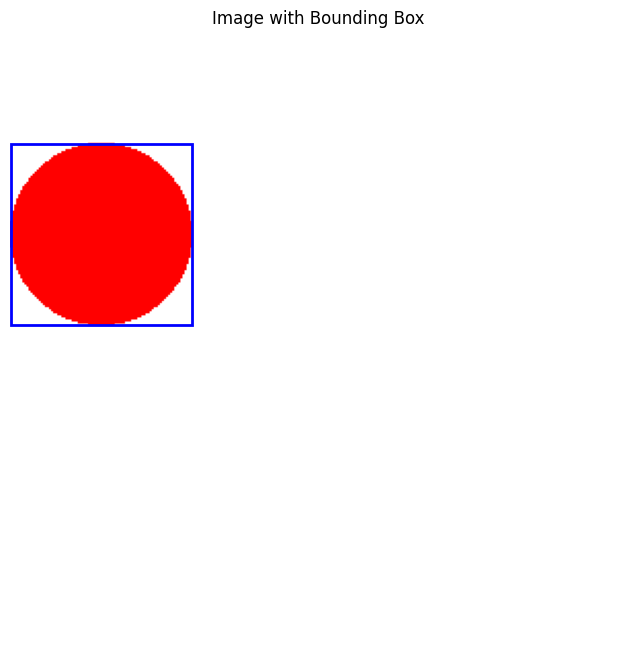

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
import xml.etree.ElementTree as ET
import os

def show_image_with_bounding_box(img_path, xml_path):
    # Загрузка изображения
    img = Image.open(img_path)
    
    # Загрузка XML и извлечение координат bounding box
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Извлечение координат из XML
    bndbox = root.find(".//bndbox")
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)

    # Настройка отображения
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)

    # Добавление рамки на изображение
    rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    
    # Установка заголовка и отображение
    ax.set_title('Image with Bounding Box')
    plt.axis('off')  # Отключение осей
    plt.show()

def main():
    # Укажите путь к изображению и XML-файлу
    img_save_path = 'img/circles/'
    xml_save_path = 'img/annotations/'

    # Для проверки одного изображения (например, первого)
    img_filename = 'circle_image_300.png'
    xml_filename = 'circle_image_300.xml'

    img_path = os.path.join(img_save_path, img_filename)
    xml_path = os.path.join(xml_save_path, xml_filename)

    show_image_with_bounding_box(img_path, xml_path)

if __name__ == "__main__":
    main()
